# HR CHURN PREDICTION

Case study:
There is an ever increase in focus of effective requirement. An organization invest a 
lot of time and resources in search of potential candidates. The investment become 
loses if the selected candidate do not join organization in the end.
Challenges:
➢ Recruiter need to understand the chances of candidate of joining the 
organization.
➢ There are numerous factors for which the candidate can backout of the job.
➢ Confidential data cannot be obtained.
Research:
The variables collected were as follows:
1. Candidate reference number 
   Unique number to identify the candidate
   
2. DOJ extended
   Binary variable identifying whether candidate asked for date of joining extension (Yes/No)
 
3. Duration to accept the offer
   Number of days taken by the candidate to accept the offer (continuous variable)
 
4. Notice period
   Notice period to be served in the parting company before candidate can join this company (continuous variable)
 
5. Offered band 
   Band offered to the candidate based on experience and performance in interview rounds (categorical variable labelled            C0/C1/C2)
 
6. Percentage hike expected
   Percentage hike expected by the candidate (continuous variable)
 
7. Percentage hike offered 
   Percentage hike offered by the company (continuous variable)
 
8. Percentage difference
   Difference of hike offered and hike expected is considered
 
9. Joining bonus
   Binary variable indicating if joining bonus was given or not (Yes/No)
 
10.Gender
   Gender of the candidate (Male/Female)
 
11.Candidate source
   Source from which resume of the candidate was obtained (categorical variables with categories: Employee referral/Agency/Direct)
 
12.Year of experience (in years)
   Relevant years of experience of the candidate for the position offered (continuous variable)
 
13.LOB
   Line of business for which offer was rolled out (categorical variable)
 
14.DOB
   Date of birth of the candidate
 
15.Joining location
   Company location for which offer was rolled out for candidate to join (categorical variable)
 
16.Candidate relocation status
   Binary variable indicating whether candidate has to relocate from one city to another city for joining (Yes/No)
 
17.HR status
   Final joining status of candidate (Joined/Not-Joined)


Dataset:
Dataset is named as “HR_Data”, It consists of 18 columns and 8998 rows in the 
dataset

# Importing the data set

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("HR_DATA.csv")

In [4]:
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [5]:
df.shape

(8998, 18)

# Exploratory data analysis

In [6]:
df.isna().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [7]:
df.columns

Index(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [8]:
df.dtypes

SLNO                             int64
Candidate.Ref                    int64
DOJ.Extended                    object
Duration.to.accept.offer         int64
Notice.period                    int64
Offered.band                    object
Pecent.hike.expected.in.CTC    float64
Percent.hike.offered.in.CTC    float64
Percent.difference.CTC         float64
Joining.Bonus                   object
Candidate.relocate.actual       object
Gender                          object
Candidate.Source                object
Rex.in.Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

In [9]:
df.Status.value_counts()

Joined        7316
Not Joined    1682
Name: Status, dtype: int64

Target variable has imbalanced class distribution. Negative class (Status=Not Joined) is much less than positive class (Status=Joined). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue. 

It is always beneficial to explore the features (independent variables) before trying to build a model. Let's first discover the features that only have two values.

In [10]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [11]:
binary_cols

['DOJ.Extended',
 'Joining.Bonus',
 'Candidate.relocate.actual',
 'Gender',
 'Status']

So 'DOJ.Extended','Joining.Bonus','Candidate.relocate.actual','Gender','Status' are binary features and the remaining features have more than two values.

# Binary Categorical features

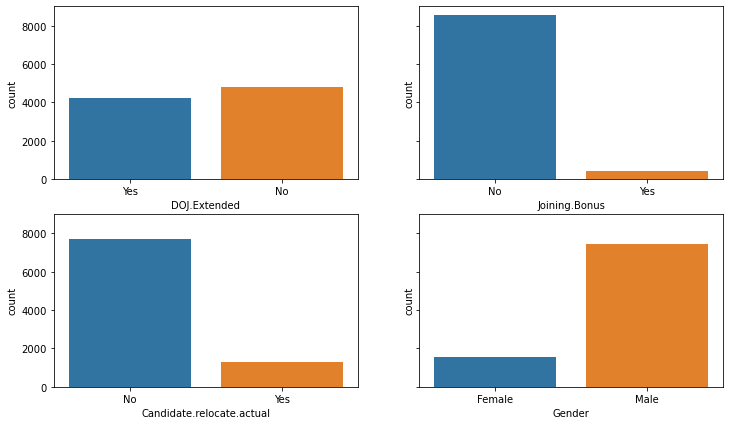

In [12]:
fig, axes = plt.subplots(2,2, figsize=(12, 7), sharey=True)

sns.countplot("DOJ.Extended", data=df, ax=axes[0,0])
sns.countplot("Joining.Bonus", data=df, ax=axes[0,1])
sns.countplot("Candidate.relocate.actual", data=df, ax=axes[1,0])
sns.countplot("Gender", data=df, ax=axes[1,1])

There is a high imbalance in Joining.Bonus,Candidate.relocate.actual and Gender variables. Most of the candidate are not female and similarly, most candidates don not have Candidate.relocate.actual and similarly ,most candidates do not have Joining.Bonus.

It is better to check how the target variable (Status) changes according to the binary features. To be able to make calculations, we need to change the values of target variable. "Joined" will be 1 and "Not Joined" will be 0.

In [13]:
churn_numeric = {'Joined':1, 'Not Joined':0}
df.Status.replace(churn_numeric, inplace=True)

In [14]:
df[['Gender','Status']].groupby(['Gender']).mean()

,Status
Gender,
Female,0.823985
Male,0.810796


Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.

In [15]:
df[['DOJ.Extended','Status']].groupby(['DOJ.Extended']).mean()

,Status
DOJ.Extended,
No,0.810856
Yes,0.815589


Average churn rate for  DOJ.Extended(YES or NO) are approximately the same which indicates DOJ.Extended variable does not bring a valuable prediction power to a model. Therefore, I will not use DOJ.Extended variable in the machine learning model.

In [16]:
df[['Joining.Bonus','Status']].groupby(['Joining.Bonus']).mean()

,Status
Joining.Bonus,
No,0.813425
Yes,0.805755


Average churn rate for Joining.Bonus(YES or NO) are approximately the same which indicates Joining.Bonus variable does not bring a valuable prediction power to a model. Therefore, I will not use Joining.Bonus variable in the machine learning model.

In [17]:
df[['Candidate.relocate.actual','Status']].groupby(['Candidate.relocate.actual']).mean()

,Status
Candidate.relocate.actual,
No,0.781785
Yes,1.000000


Average churn rate for Candidate.relocate.actual(YES or NO) are not so close which indicates that we can use Candidate.relocate.actual in our Model

In [18]:
table = pd.pivot_table(df, values='Status', index=['Gender'],
                    columns=['DOJ.Extended'], aggfunc=np.mean)
table

DOJ.Extended,No,Yes
Gender,,
Female,0.822619,0.825598
Male,0.808354,0.813554


In [19]:
table = pd.pivot_table(df, values='Status', index=['Joining.Bonus'],
                    columns=['Candidate.relocate.actual'], aggfunc=np.mean)
table

Candidate.relocate.actual,No,Yes
Joining.Bonus,,
No,0.784203,1.0
Yes,0.719723,1.0


# Other categorical features

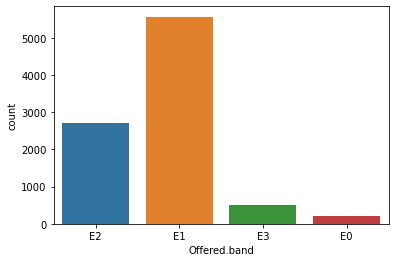

In [20]:
sns.countplot("Offered.band", data=df)

In [21]:
df[['Offered.band','Status']].groupby('Offered.band').mean()

,Status
Offered.band,
E0,0.763033
E1,0.813106
E2,0.809735
E3,0.851485


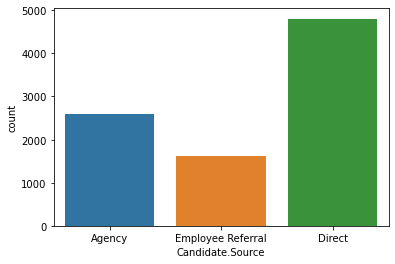

In [22]:
sns.countplot("Candidate.Source", data=df)

In [23]:
df[['Candidate.Source','Status']].groupby('Candidate.Source').mean()

,Status
Candidate.Source,
Agency,0.758221
Direct,0.820112
Employee Referral,0.880124


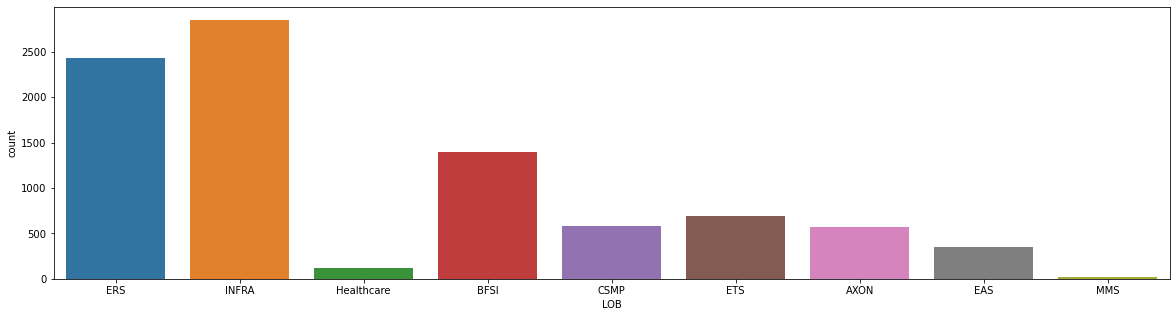

In [24]:
plt.figure(figsize = (20,5))

sns.countplot("LOB", data=df)

In [25]:
df[['LOB','Status']].groupby('LOB').mean()

,Status
LOB,
AXON,0.774648
BFSI,0.758596
CSMP,0.815199
EAS,0.734104
ERS,0.781211
ETS,0.831169
Healthcare,0.822581
INFRA,0.877895
MMS,1.000000


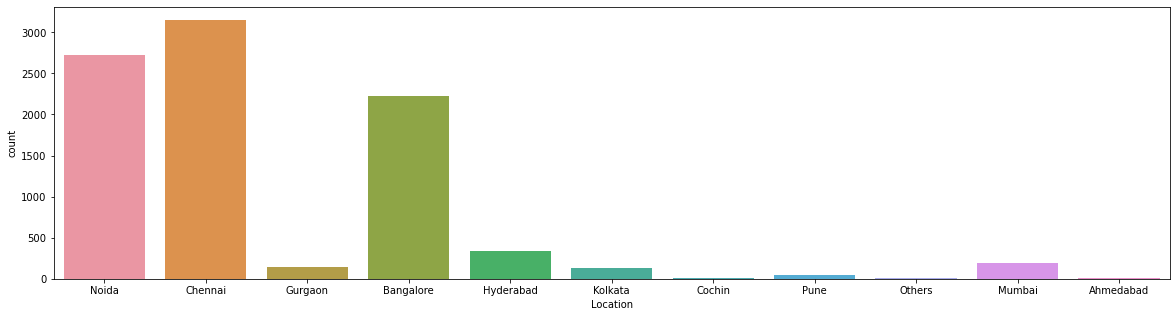

In [26]:
plt.figure(figsize = (20,5))

sns.countplot("Location", data=df)

In [27]:
df[['Location','Status']].groupby('Location').mean()

,Status
Location,
Ahmedabad,0.833333
Bangalore,0.781264
Chennai,0.789273
Cochin,0.875000
Gurgaon,0.808219
Hyderabad,0.780059
Kolkata,0.775194
Mumbai,0.893401
Noida,0.866202


# Continuous Features

In [28]:
df

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,1
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,1
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,1
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,1
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,1
8994,12333,3836076,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,1
8995,12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,1
8996,11882,3664089,No,5,0,E2,20.00,10.00,-8.33,No,No,Male,Direct,8,ETS,Noida,34,1


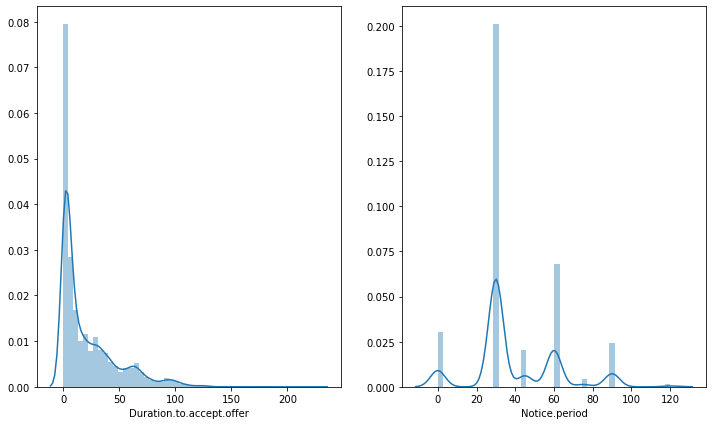

In [29]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.distplot(df["Duration.to.accept.offer"], ax=axes[0])
sns.distplot(df["Notice.period"], ax=axes[1])


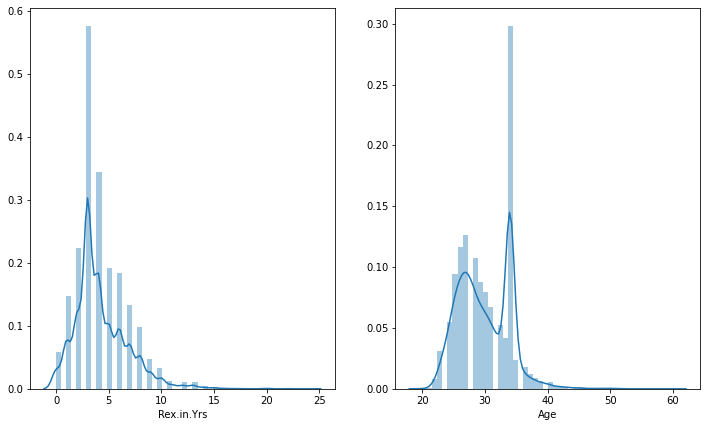

In [30]:
fig, axes = plt.subplots(1,2 ,figsize=(12, 7))
sns.distplot(df["Rex.in.Yrs"], ax=axes[0])
sns.distplot(df["Age"], ax=axes[1])

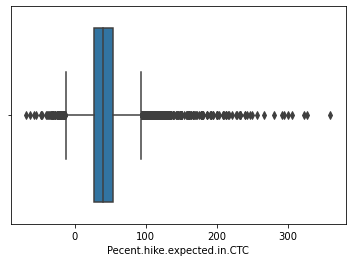

In [31]:
sns.boxplot(df['Pecent.hike.expected.in.CTC'])

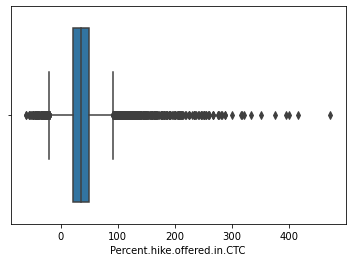

In [32]:
sns.boxplot(df['Percent.hike.offered.in.CTC'])

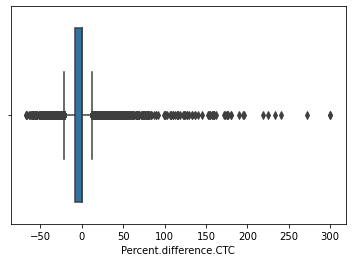

In [33]:
sns.boxplot(df['Percent.difference.CTC'])

In [34]:
df[['Duration.to.accept.offer','Notice.period','Percent.hike.offered.in.CTC','Percent.difference.CTC','Rex.in.Yrs','Age','Status']].groupby('Status').mean()


,Duration.to.accept.offer,Notice.period,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
Status,,,,,,
0,24.956599,48.192628,38.588460,-2.929298,4.439358,29.517836
1,20.617687,37.233461,41.147158,-1.263402,4.193002,30.004647


In [35]:
df.drop(['Candidate.Ref','Gender','DOJ.Extended','Joining.Bonus'], axis=1, inplace=True)

In [36]:
df

,SLNO,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Candidate.relocate.actual,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,14,30,E2,-20.79,13.16,42.86,No,Agency,7,ERS,Noida,34,1
1,2,18,30,E2,50.00,320.00,180.00,No,Employee Referral,8,INFRA,Chennai,34,1
2,3,3,45,E2,42.84,42.84,0.00,No,Agency,4,INFRA,Noida,27,1
3,4,26,30,E2,42.84,42.84,0.00,No,Employee Referral,4,INFRA,Noida,34,1
4,5,1,120,E2,42.59,42.59,0.00,Yes,Employee Referral,6,INFRA,Noida,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,12332,0,30,E1,76.92,53.85,-13.04,No,Direct,4,INFRA,Noida,34,1
8994,12333,2,0,E1,45.25,14.09,-21.45,No,Employee Referral,1,INFRA,Chennai,34,1
8995,12319,4,0,E1,191.67,191.67,0.00,No,Employee Referral,1,ERS,Chennai,34,1
8996,11882,5,0,E2,20.00,10.00,-8.33,No,Direct,8,ETS,Noida,34,1


# Data Preprocessing

Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. The categorical variables in our data set are not ordinal (i.e. there is no order in them).
We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [38]:
cat_features = ['Candidate.Source','LOB','Candidate.relocate.actual','Location','Offered.band']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [39]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['Notice.period']])
b = sc.fit_transform(df[['Duration.to.accept.offer']])

In [40]:
X['Notice.period'] = a
X['Duration.to.accept.offer'] = b

In [41]:
X.shape

(8998, 33)

# Resampling

As we briefly discussed in the beginning, target variables with imbalanced class distribution is not desired for machine learning models. I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

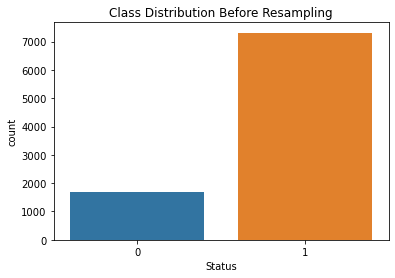

In [42]:
sns.countplot('Status', data=df).set_title('Class Distribution Before Resampling')

here 0 means Not Joined and 1 means Joined

In [43]:
X_no = X[X.Status == 0]
X_yes = X[X.Status == 1]

In [44]:
print(len(X_no),len(X_yes))

1682 7316


In [45]:
X_no_upsampled = X_no.sample(n=len(X_yes), replace=True, random_state=42)
print(len(X_no_upsampled))

7316


In [46]:
X_upsampled = X_yes.append(X_no_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

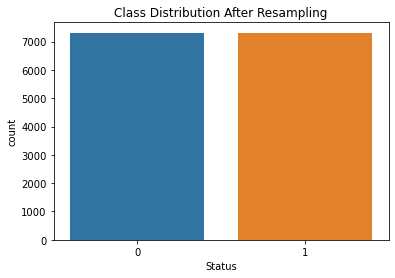

In [47]:
sns.countplot('Status', data=X_upsampled).set_title('Class Distribution After Resampling')

# ML Model

We need to divide the data set into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = X_upsampled.drop(['Status'], axis=1) #features (independent variables)
y = X_upsampled['Status'] #target (dependent variable)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Ridge Classifier

I have decided to use ridge classifier as a base model. Then I will try a model that I think will perform better.

In [51]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [52]:
clf_ridge = RidgeClassifier()
clf_ridge.fit(X_train, y_train) 

RidgeClassifier()

In [53]:
pred = clf_ridge.predict(X_train)

In [54]:
accuracy_score(y_train, pred) 

0.6733020076890218

In [55]:
confusion_matrix(y_train, pred)

array([[4494, 1353],
       [2471, 3387]], dtype=int64)

In [56]:
pred_test = clf_ridge.predict(X_test)

In [57]:
accuracy_score(y_test, pred_test)

0.6771438332763922

# Random Forests

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)

In [60]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [61]:
pred = clf_forest.predict(X_train)

In [62]:
accuracy_score(y_train, pred)

0.8311832550192225

In [63]:
confusion_matrix(y_train, pred)

array([[5177,  670],
       [1306, 4552]], dtype=int64)

In [64]:
pred_test = clf_forest.predict(X_test)

In [65]:
accuracy_score(y_test, pred_test)

0.790570550051247

In Ridge Classifier ,there is an accuracy of nearly 68 % while In Random Forest ,there is an accuracy of nearly 80 % which is quite good.

Also we can try for another classification model in order to get better accuracy as much as we can.

# Finished !!!!